In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams  ## run command settings for plotting
from sklearn.model_selection import train_test_split 
#导入必要的库
#设置画图参数
config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号
    'axes.unicode_minus': False # 处理负号
}
rcParams.update(config)

In [146]:
path=r'D:\My_files_in_GZU\学习\大二\机器学习\machine-learning\4th_homework\ex2data1.txt'
data=pd.read_csv(path, header=None)
data.head()


,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [147]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [148]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]
y_data = data.iloc[:,:cols]

In [149]:
data.insert(0, 'ones', 1)#在第一行插入全1
cols=data.shape[1]
X_data=data.iloc[:,:cols-1]
y_data=data.iloc[:,cols-1:]
X=X_data.values
y=y_data.values
(X.shape,y.shape)

((100, 3), (100, 1))

In [150]:
#划分数据集
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [151]:
for i in range(1, cols-1):
    min = x_train[:, i].min()
    max = x_train[:, i].max()
    x_train[:, i] = (x_train[:, i] - min) / (max - min)
    x_test[:, i] = (x_test[:, i] - min) / (max - min)

In [152]:
x_train.shape,y_train.shape

((70, 3), (70, 1))

In [153]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [154]:
feature_dim = x_train.shape[0]
W = np.zeros((feature_dim,1))
feature_dim,W

(70,
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [187]:
def computeCost(X, Y, W):
    P = sigmoid(X@W)
    loss = np.sum(-Y*np.log(P) - (1-Y) * np.log(1-P)) / X.shape[1]
    return loss,P

In [194]:
alpha = 0.005
def gradientDecent(W, X, Y):
    error = sigmoid(X@W) - Y
    grad = X.T@error / X.shape[1]
    W -= alpha * grad
    return W

In [195]:
def logisticRegression(x_train,y_train,x_test,y_test,alpha,iters): 
    loss_train, loss_test = [],[]
    # stepl:initialize the model parameters 
    feature_dim = x_train.shape[1] 
    W=np.zeros((feature_dim,1))#初始化w系数矩阵，w是一个(feature_dim,l)矩阵
    #repeat step 2 and step 3 untill to the convergence or the end of iterations 
    for i in range (iters): 
        # step2 using the initilized parameters to predict the output and calculate the loss 
        loss,P = computeCost(x_train,y_train,W) 
        loss_train.append(loss)
        loss,p = computeCost(x_test,y_test,W) 
        loss_test.append(loss)
        # step3:using the gradient decent method to update the parameters 
        W=gradientDecent(W,x_train,y_train) 
    return loss_train,loss_test,W#返回损失和模型参数。

In [198]:
alpha = 0.001
iters = 100000
loss_train, loss_test, W = logisticRegression(x_train, y_train, alpha, iters)
W

array([[-10.09331421],
       [ 11.05312516],
       [ 11.43328317]])

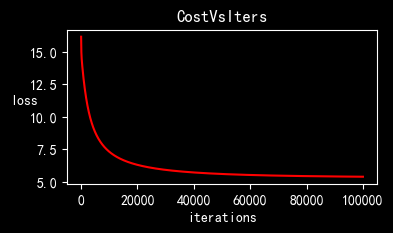

In [199]:
#设置训练参数
alpha=0.0001
iters=40000
iter = np.arange(iters)
plt.figure()
plt.plot(iter,loss_train,'r',label='训练损失')
plt.plot(iter,loss_test,'b',label='测试损失')
plt.legend()
plt.xlabel("迭代次数")
plt.ylabel("损失")
plt.show()